In [ ]:
# Install once if not already done
if (!requireNamespace("stringi", quietly = TRUE)) install.packages("stringi")
if (!requireNamespace("readr", quietly = TRUE)) install.packages("readr")

library(stringi)
library(readr)

# We are in /content, so look for all CSVs here
input_dir  <- "."                   # current directory
output_dir <- "R_data_set_cleaned"  # where cleaned files will go
dir.create(output_dir, showWarnings = FALSE)

toCamel <- function(x) {
  s <- gsub("[^[:alnum:]]+", " ", x)
  s <- stri_trim_both(s)
  s <- tolower(s)
  parts <- unlist(strsplit(s, "\\s+"))
  if (length(parts) == 0) return("")
  camel <- parts[1]
  if (length(parts) > 1) {
    rest <- sapply(parts[-1], function(p)
      paste0(toupper(substring(p, 1, 1)), substring(p, 2)))
    camel <- paste0(c(camel, rest), collapse = "")
  }
  if (grepl("^[0-9]", camel)) camel <- paste0("x", camel)
  gsub("[^[:alnum:]]", "", camel)
}

csv_files <- list.files(input_dir, pattern = "\\.csv$", full.names = TRUE)
csv_files


[1] "./518e560e-7fa7-4f5b-8aed-3b90323ed965.csv"    
[2] "./7932c3ed-c88d-4e0c-bc39-17e3e3170483 (1).csv"
[3] "./8b75d7c2-814b-4eb2-9698-c96d69e5f128.csv"    
[4] "./8d3b6596-b09e-4077-aebf-425193185a5b.csv"    
[5] "./productconsumption.csv"

In [ ]:
# Clean and save all detected CSVs
for (f in csv_files) {
  cat("\nProcessing:", basename(f), "\n")
  df <- read_csv(f, show_col_types = FALSE)

  # Convert to camelCase
  old_names <- names(df)
  new_names <- sapply(old_names, toCamel, USE.NAMES = FALSE)
  new_names <- make.names(new_names, unique = TRUE)
  new_names <- gsub("\\.+", "", new_names)
  names(df) <- new_names

  # Save to cleaned folder
  out_path <- file.path(output_dir, basename(f))
  write_csv(df, out_path)
  cat("Saved →", out_path, "\n")
}

cat("\n✅ Done. Cleaned files are in:", output_dir, "\n")



Processing: 518e560e-7fa7-4f5b-8aed-3b90323ed965.csv 
Saved → R_data_set_cleaned/518e560e-7fa7-4f5b-8aed-3b90323ed965.csv 

Processing: 7932c3ed-c88d-4e0c-bc39-17e3e3170483 (1).csv 
Saved → R_data_set_cleaned/7932c3ed-c88d-4e0c-bc39-17e3e3170483 (1).csv 

Processing: 8b75d7c2-814b-4eb2-9698-c96d69e5f128.csv 
Saved → R_data_set_cleaned/8b75d7c2-814b-4eb2-9698-c96d69e5f128.csv 

Processing: 8d3b6596-b09e-4077-aebf-425193185a5b.csv 
Saved → R_data_set_cleaned/8d3b6596-b09e-4077-aebf-425193185a5b.csv 

Processing: productconsumption.csv 
Saved → R_data_set_cleaned/productconsumption.csv 

✅ Done. Cleaned files are in: R_data_set_cleaned 


In [ ]:
library(readr)
library(dplyr)

# 1️⃣ Load crude oil production data
df <- read_csv("R_data_set_cleaned/crudeOilProduction.csv", show_col_types = FALSE)

# 2️⃣ View first few rows
head(df)

# 3️⃣ Check missing values
colSums(is.na(df))


month,year,companyName,quantity000MetricTonnes,lastUpdated
<chr>,<dbl>,<chr>,<dbl>,<lgl>
April,2023,ONGC,1.51,NA
April,2023,Total crude oil,2.26,NA
April,2023,Total ( Crude oil + Condensate),2.38,NA
May,2023,Total ( Crude oil + Condensate),2.50,NA
June,2023,ONGC,1.50,NA
July,2023,OIL,0.28,NA


month                    year             companyName 
                      0                       0                       0 
quantity000MetricTonnes             lastUpdated 
                      0                     168

In [ ]:
# Remove the column 'lastUpdated' since it's entirely NA
df <- df %>% select(-lastUpdated)

# Check that it worked
head(df)


month,year,companyName,quantity000MetricTonnes
<chr>,<dbl>,<chr>,<dbl>
April,2023,ONGC,1.51
April,2023,Total crude oil,2.26
April,2023,Total ( Crude oil + Condensate),2.38
May,2023,Total ( Crude oil + Condensate),2.50
June,2023,ONGC,1.50
July,2023,OIL,0.28


In [ ]:
write_csv(df, "R_data_set_cleaned/crudeOilProduction_clean.csv")


In [ ]:
library(readr)
library(dplyr)

# 1️⃣ Load the refinery production data
df <- read_csv("R_data_set_cleaned/refineryProduction.csv", show_col_types = FALSE)

# 2️⃣ Peek at the first few rows
head(df)

# 3️⃣ Check for missing values in each column
colSums(is.na(df))


month,year,oilCompanies,quantity000MetricTonnes
<chr>,<dbl>,<chr>,<dbl>
April,2023,"IOCL-BARAUNI,BIHAR",546.51
April,2023,IOCL TOTAL,6037.64
April,2023,ONGC TOTAL,1475.55
April,2023,RIL TOTAL,5355.74
May,2023,"IOCL-MATHURA, UTTAR PRADESH",833.52
May,2023,"IOCL-PANIPAT, HARYANA",1263.15


month                    year            oilCompanies 
                      0                       0                       0 
quantity000MetricTonnes 
                      4

In [ ]:
# Install the zoo package once (used for interpolation)
if (!requireNamespace("zoo", quietly = TRUE)) install.packages("zoo")
library(zoo)

# Fill missing production values using linear interpolation
df <- df %>%
  arrange(year, month) %>%         # ensure chronological order
  mutate(quantity000MetricTonnes = zoo::na.approx(quantity000MetricTonnes, na.rm = FALSE))

# Check again
colSums(is.na(df))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




month                    year            oilCompanies 
                      0                       0                       0 
quantity000MetricTonnes 
                      0

In [ ]:
write_csv(df, "R_data_set_cleaned/refineryProduction_clean.csv")

In [ ]:
library(readr)
library(dplyr)

# 1️⃣ Load the product output data
df <- read_csv("R_data_set_cleaned/productOutput.csv", show_col_types = FALSE)

# 2️⃣ See the first few rows
head(df)

# 3️⃣ Check for missing values
colSums(is.na(df))


month,year,products,quantity000MetricTonnes,updatedDate
<chr>,<dbl>,<chr>,<dbl>,<date>
April,2023,HSD Others,2298.86,2024-04-29
April,2023,Others,2587.04,2024-04-29
May,2023,MS-VI,2388.04,2024-04-29
May,2023,BITUMEN,507.71,2024-04-29
June,2023,LPG,1085.86,2024-04-29
June,2023,NAPHTHA,1478.84,2024-04-29


month                    year                products 
                      0                       0                       0 
quantity000MetricTonnes             updatedDate 
                      0                       0

In [ ]:
write_csv(df, "R_data_set_cleaned/productOutput_clean.csv")

In [ ]:
library(readr)
library(dplyr)

# 1️⃣ Load the trade data
df <- read_csv("R_data_set_cleaned/tradeData.csv", show_col_types = FALSE)

# 2️⃣ Look at the first few rows
head(df)

# 3️⃣ Count NAs in each column
colSums(is.na(df))


month,year,products,trade,quantity000MetricTonnes,valueInRupeesCrore,valueInDollarsMillionUsDollar,dateUpdated
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>
April,2024,CRUDE OIL,Import,21439.18,108423.37,12992.64,2025-07-30 04:00:25
April,2024,LPG,Import,1453.05,7414.22,888.96,2025-07-30 04:00:25
April,2024,MS,Import,29.99,224.85,26.97,2025-07-30 04:00:25
April,2024,Naphtha,Import,121.22,735.58,88.19,2025-07-30 04:00:25
April,2024,ATF,Import,0.00,0.02,0.00,2025-07-30 04:00:25
April,2024,HSD,Import,1.75,11.46,1.37,2025-07-30 04:00:25


month                          year 
                            0                             0 
                     products                         trade 
                            0                             0 
      quantity000MetricTonnes            valueInRupeesCrore 
                           14                            14 
valueInDollarsMillionUsDollar                   dateUpdated 
                           14                             0

In [ ]:
if (!requireNamespace("zoo", quietly = TRUE)) install.packages("zoo")
library(zoo)
library(dplyr)

# Fill numeric columns by linear interpolation
df <- df %>%
  arrange(year, month) %>%
  mutate(
    quantity000MetricTonnes = zoo::na.approx(quantity000MetricTonnes, na.rm = FALSE),
    valueInRupeesCrore = zoo::na.approx(valueInRupeesCrore, na.rm = FALSE),
    valueInDollarsMillionUsDollar = zoo::na.approx(valueInDollarsMillionUsDollar, na.rm = FALSE)
  )

# Check again
colSums(is.na(df))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




month                          year 
                            0                             0 
                     products                         trade 
                            0                             0 
      quantity000MetricTonnes            valueInRupeesCrore 
                            0                             0 
valueInDollarsMillionUsDollar                   dateUpdated 
                            0                             0

In [ ]:
write_csv(df, "R_data_set_cleaned/tradeData_clean.csv")


In [ ]:
library(readr)
library(dplyr)

# 1️⃣ Load the product consumption data
df <- read_csv("R_data_set_cleaned/productconsumption.csv", show_col_types = FALSE)

# 2️⃣ Preview a few rows
head(df)

# 3️⃣ Check which columns have NAs
colSums(is.na(df))


month,year,products,quantity000MetricTonnes,updatedDate
<chr>,<dbl>,<chr>,<dbl>,<date>
August,2023,ATF,676.75,2024-01-03
July,2023,ATF,663.23,2024-01-03
June,2023,ATF,642.33,2024-01-03
May,2023,ATF,670.58,2024-01-03
April,2023,ATF,655.98,2024-01-03
March,2023,ATF,688.48,2024-01-03


month                    year                products 
                      0                       0                       0 
quantity000MetricTonnes             updatedDate 
                      0                       0

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


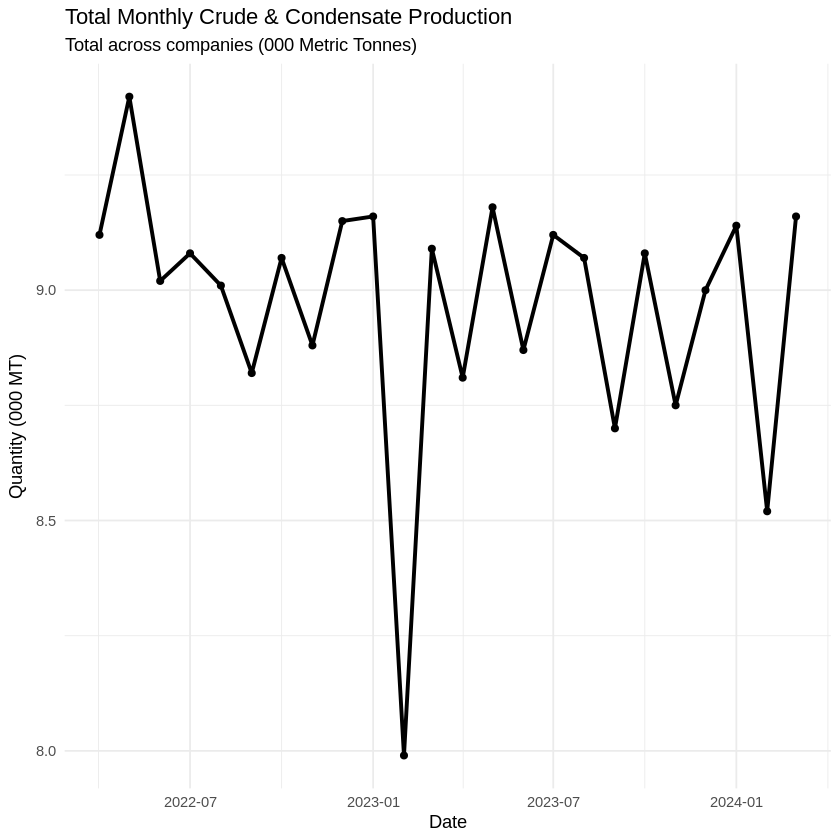

In [ ]:
# --- Plot A: Total monthly crude production (line) ---
# Run in Colab R cell

# packages
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("lubridate", quietly = TRUE)) install.packages("lubridate")
library(tidyverse)
library(lubridate)

# load
df <- read_csv("R_data_set_cleaned/crudeOilProduction_clean.csv", show_col_types = FALSE)

# create an actual Date for plotting: assume day 1 of month
df <- df %>%
  mutate(
    month = str_to_title(month),
    # parse month name to month number
    monthNum = match(month, month.name),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  )

# aggregate by date
agg <- df %>%
  group_by(date) %>%
  summarise(totalCrude000MT = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  arrange(date)

# plot
p1 <- ggplot(agg, aes(x = date, y = totalCrude000MT)) +
  geom_line(size = 1.1) +
  geom_point(size = 1.6) +
  labs(
    title = "Total Monthly Crude & Condensate Production",
    subtitle = "Total across companies (000 Metric Tonnes)",
    x = "Date", y = "Quantity (000 MT)"
  ) +
  theme_minimal()
print(p1)
# Save if you want:
# ggsave("crude_total_timeseries.png", p1, width=9, height=4)


In [ ]:
head(agg)



date,totalCrudeMT
<date>,<dbl>
2022-04-01,0.00912
2022-05-01,0.00942
2022-06-01,0.00902
2022-07-01,0.00908
2022-08-01,0.00901
2022-09-01,0.00882


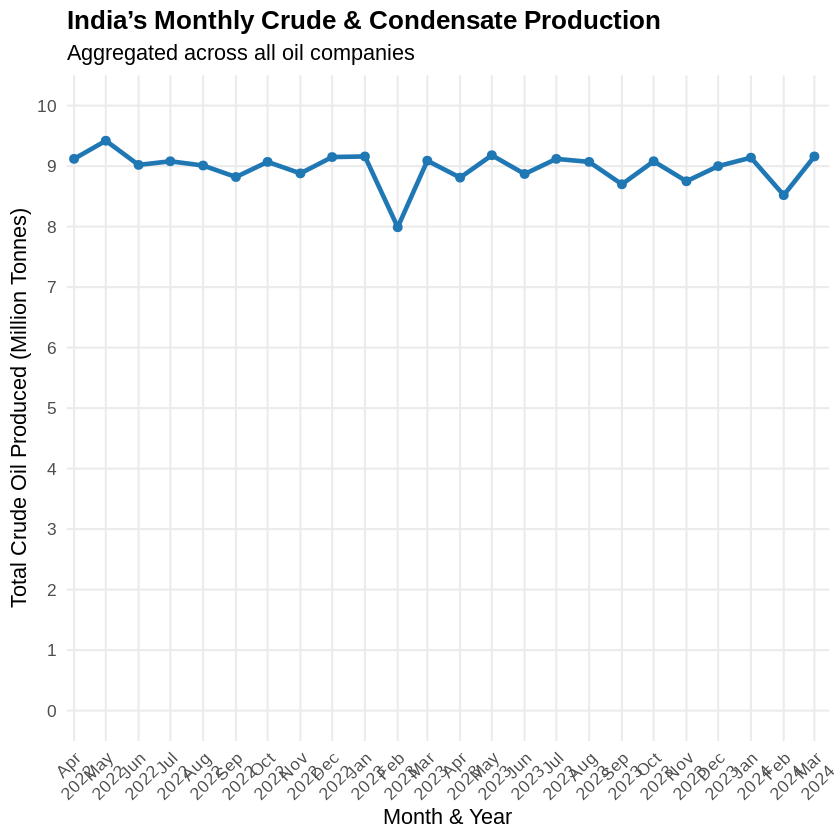

In [ ]:
# Use the same df from before; re-aggregate correctly
agg <- df %>%
  group_by(date) %>%
  summarise(totalCrudeMT = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  arrange(date)

# Plot properly scaled line chart
p <- ggplot(agg, aes(x = date, y = totalCrudeMT)) +
  geom_line(color = "#1F77B4", linewidth = 1.3) +
  geom_point(color = "#1F77B4", size = 2) +
  scale_x_date(
    date_labels = "%b\n%Y",
    date_breaks = "1 month",
    expand = expansion(mult = c(0.01, 0.02))
  ) +
  scale_y_continuous(
    name = "Total Crude Oil Produced (Million Tonnes)",
    limits = c(0, 10),
    breaks = seq(0, 10, 1)
  ) +
  labs(
    title = "India’s Monthly Crude & Condensate Production",
    subtitle = "Aggregated across all oil companies",
    x = "Month & Year"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )

print(p)


In [ ]:
head(df_plot)
summary(df_plot$totalCrude)


date,companyGroup,totalCrude
<date>,<chr>,<dbl>
2022-04-01,JVC/ Private,0.55
2022-04-01,ONGC,1.56
2022-04-01,Other,0.36
2022-04-01,PSU total (Crude Oil),1.82
2022-04-01,Total ( Crude oil + Condensate),2.47
2022-04-01,Total crude oil,2.36


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.360   0.500   1.610   1.495   2.295   2.550 

In [ ]:
p_area <- ggplot(df_plot, aes(x = date, y = totalCrude, fill = companyGroup)) +
  geom_area(alpha = 0.85) +
  scale_x_date(
    date_labels = "%b\n%Y",
    date_breaks = "2 month",
    expand = expansion(mult = c(0.01, 0.02))
  ) +
  scale_y_continuous(
    name = "Crude Oil Produced (Million Tonnes)",
    limits = c(0, 10),               # smaller, visible range
    breaks = seq(0, 10, 1)
  ) +
  labs(
    title = "Crude Oil Production by Company",
    subtitle = "Top 5 producers stacked over time",
    x = "Month & Year",
    fill = "Company"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )

print(p_area)


ERROR: [1m[33mError[39m in `geom_area()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error:[22m
[33m![39m object 'totalCrude' not found


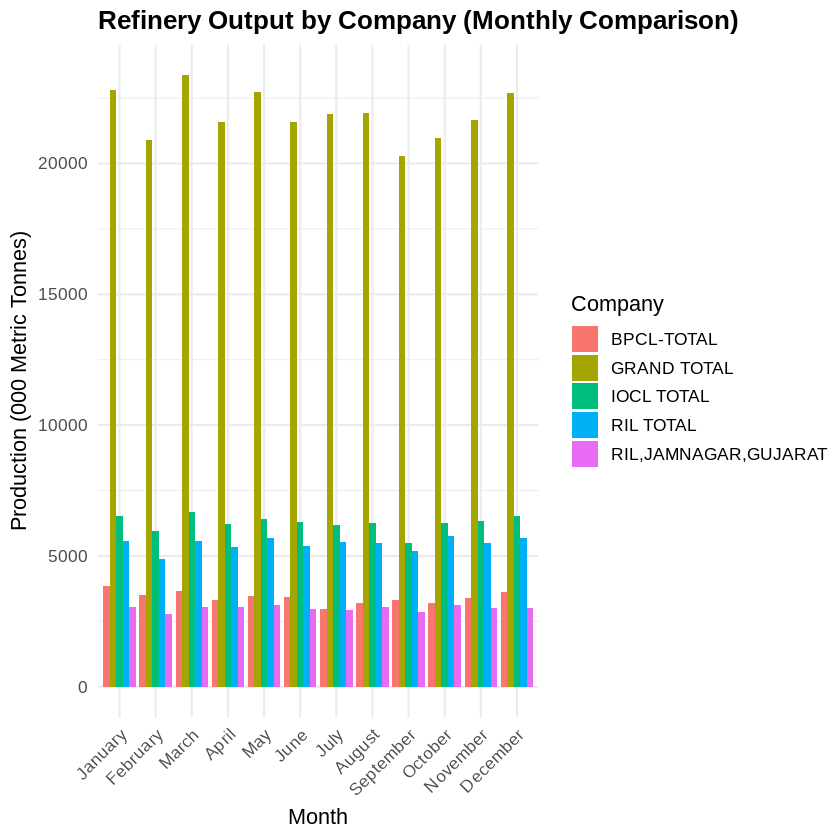

In [ ]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(stringr)
library(readr)

df <- read_csv("R_data_set_cleaned/refineryProduction_clean.csv", show_col_types = FALSE)

df <- df %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  )

# pick top 5 companies for clarity
top_companies <- df %>%
  group_by(oilCompanies) %>%
  summarise(total = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  slice_max(total, n = 5) %>%
  pull(oilCompanies)

df_plot <- df %>%
  filter(oilCompanies %in% top_companies)

ggplot(df_plot, aes(x = factor(month, levels = month.name),
                    y = quantity000MetricTonnes,
                    fill = oilCompanies)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Refinery Output by Company (Monthly Comparison)",
    x = "Month", y = "Production (000 Metric Tonnes)", fill = "Company"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold")
  )


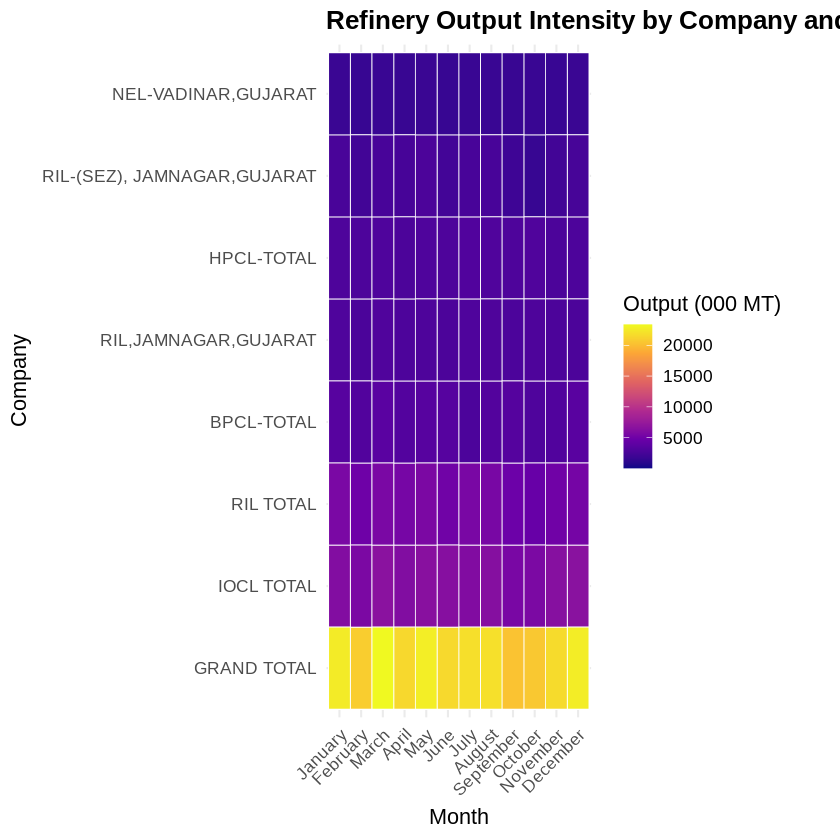

In [ ]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(readr)
library(stringr)

df <- read_csv("R_data_set_cleaned/refineryProduction_clean.csv", show_col_types = FALSE)

df <- df %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    monthLabel = factor(month, levels = month.name)
  )

top_companies <- df %>%
  group_by(oilCompanies) %>%
  summarise(total = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  slice_max(total, n = 8) %>%
  pull(oilCompanies)

df_plot <- df %>%
  filter(oilCompanies %in% top_companies)

ggplot(df_plot, aes(x = monthLabel, y = reorder(oilCompanies, -quantity000MetricTonnes), fill = quantity000MetricTonnes)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "C") +
  labs(
    title = "Refinery Output Intensity by Company and Month",
    x = "Month", y = "Company", fill = "Output (000 MT)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold")
  )


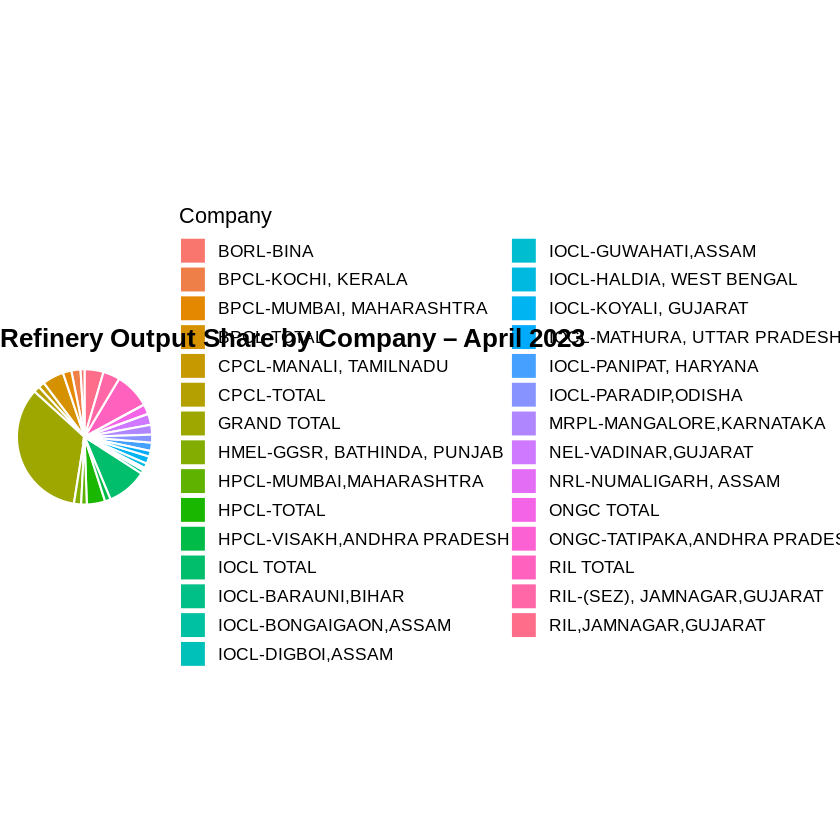

In [ ]:
library(ggplot2)
library(dplyr)
library(readr)

df <- read_csv("R_data_set_cleaned/refineryProduction_clean.csv", show_col_types = FALSE)

# Choose one month, say April 2023
df_month <- df %>%
  filter(month == "April", year == 2023) %>%
  group_by(oilCompanies) %>%
  summarise(total = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  arrange(desc(total))

ggplot(df_month, aes(x = "", y = total, fill = oilCompanies)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0) +
  labs(
    title = "Refinery Output Share by Company – April 2023",
    fill = "Company"
  ) +
  theme_void(base_size = 13) +
  theme(plot.title = element_text(face = "bold"))


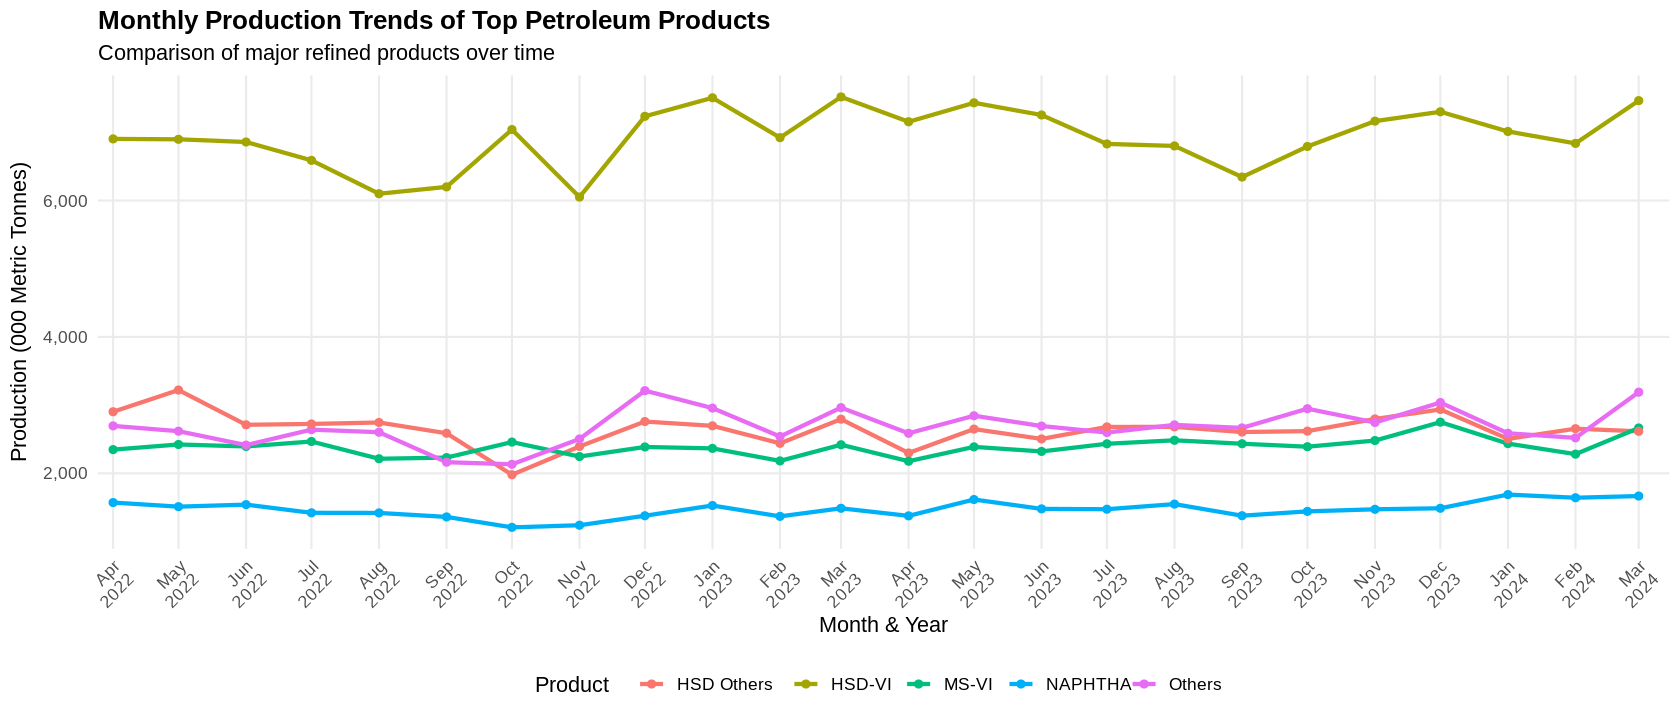

In [ ]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(readr)
library(stringr)

# Load the data
df <- read_csv("R_data_set_cleaned/productOutput_clean.csv", show_col_types = FALSE)

# Clean and prepare
df <- df %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  )

# Identify top 5 products by total production
top_products <- df %>%
  group_by(products) %>%
  summarise(totalOutput = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  arrange(desc(totalOutput)) %>%
  slice_head(n = 5) %>%
  pull(products)

# Filter only top products for readability
df_plot <- df %>% filter(products %in% top_products)

# Plot multiple lines
options(repr.plot.width = 14, repr.plot.height = 6)
p_lines <- ggplot(df_plot, aes(x = date, y = quantity000MetricTonnes, color = products, group = products)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 1.8) +
  scale_x_date(
    date_labels = "%b\n%Y",
    date_breaks = "1 month",
    expand = expansion(mult = c(0.01, 0.02))
  ) +
  scale_y_continuous(
    name = "Production (000 Metric Tonnes)",
    labels = scales::comma
  ) +
  labs(
    title = "Monthly Production Trends of Top Petroleum Products",
    subtitle = "Comparison of major refined products over time",
    x = "Month & Year",
    color = "Product"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank(),
    legend.position = "bottom"
  )

print(p_lines)


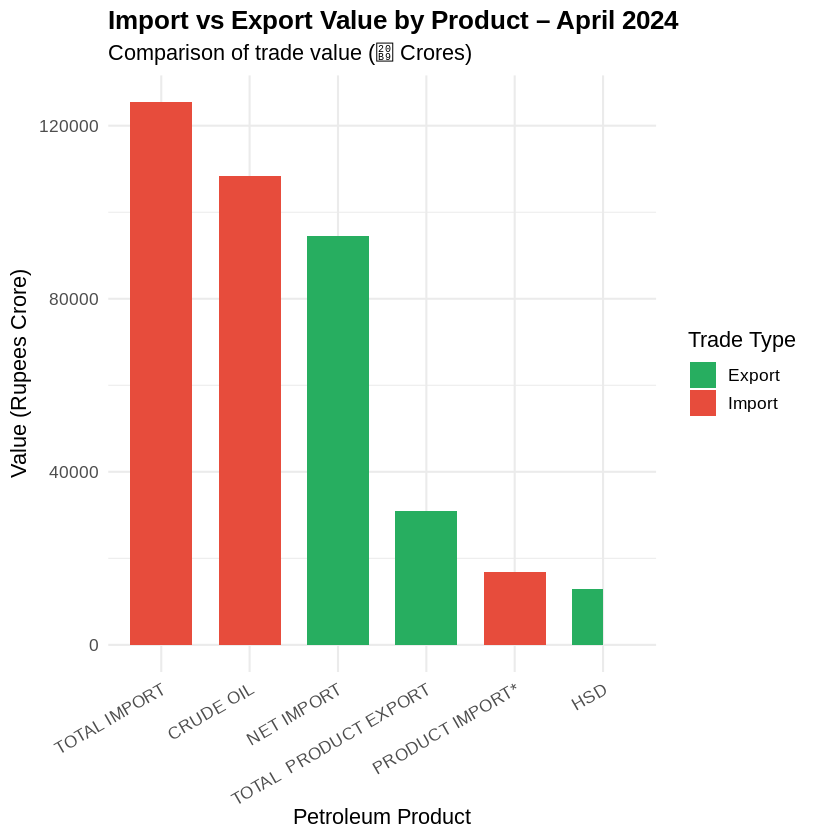

In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)

# Load the cleaned trade dataset
df <- read_csv("R_data_set_cleaned/tradeData_clean.csv", show_col_types = FALSE)

# Clean product names, trade column, and filter one month for clarity
df <- df %>%
  mutate(
    month = str_to_title(str_trim(month)),
    trade = str_to_title(str_trim(trade))
  )

# Choose one representative month (e.g., April 2024)
df_month <- df %>%
  filter(month == "April", year == 2024)

# Keep top 6 traded products by total trade value
top_products <- df_month %>%
  group_by(products) %>%
  summarise(totalValue = sum(valueInRupeesCrore, na.rm = TRUE)) %>%
  slice_max(totalValue, n = 6) %>%
  pull(products)

df_plot <- df_month %>%
  filter(products %in% top_products)

# Plot grouped bar chart
ggplot(df_plot, aes(x = reorder(products, -valueInRupeesCrore),
                    y = valueInRupeesCrore,
                    fill = trade)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  scale_fill_manual(values = c("Import" = "#E74C3C", "Export" = "#27AE60")) +
  labs(
    title = "Import vs Export Value by Product – April 2024",
    subtitle = "Comparison of trade value (₹ Crores)",
    x = "Petroleum Product",
    y = "Value (Rupees Crore)",
    fill = "Trade Type"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.title = element_text(face = "bold")
  )


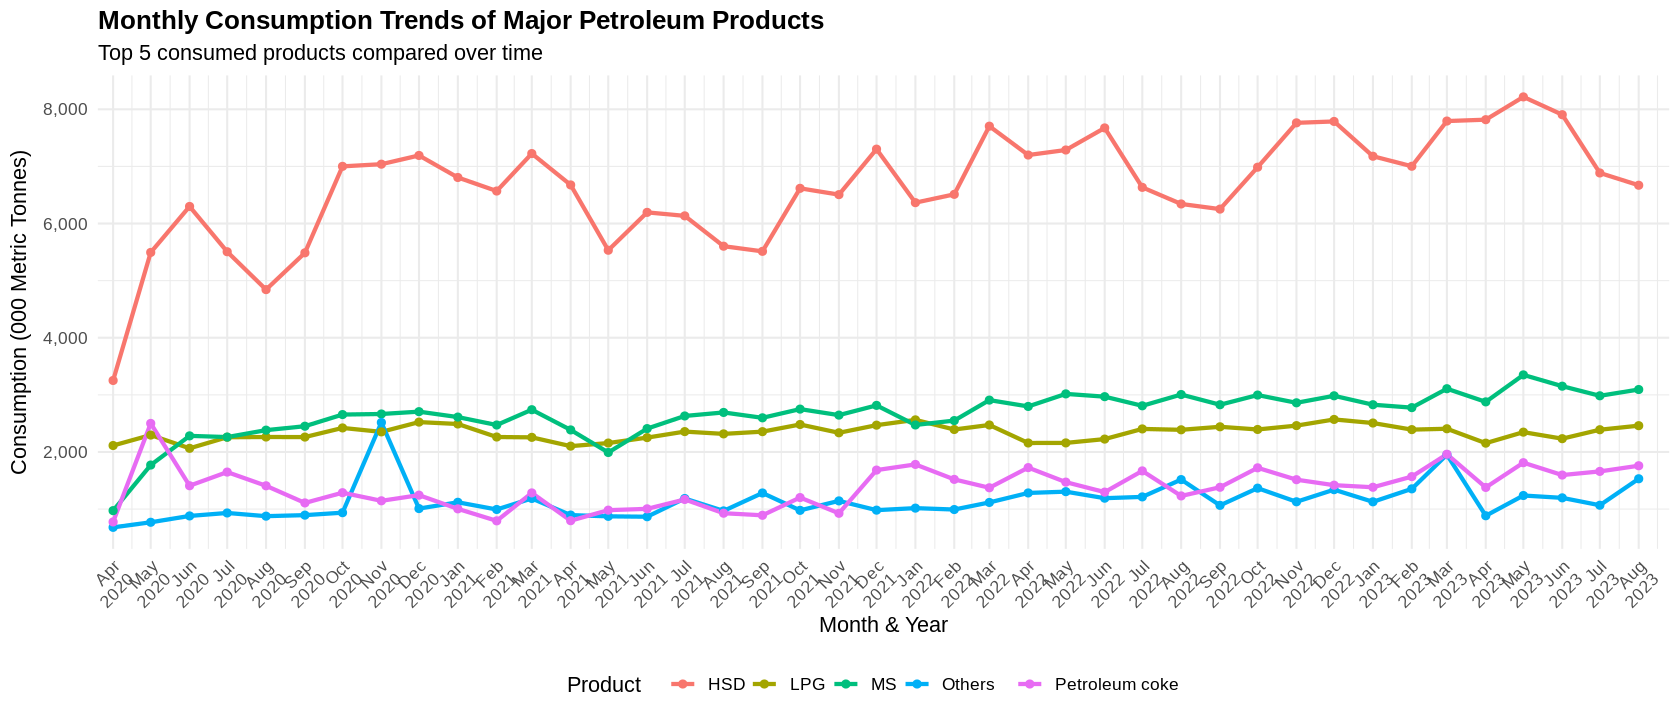

In [ ]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(stringr)
library(readr)

# Load data
df <- read_csv("R_data_set_cleaned/productConsumption.csv", show_col_types = FALSE)

# Clean and prepare
df <- df %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  )

# Identify top 5 consumed products
top_products <- df %>%
  group_by(products) %>%
  summarise(totalConsumption = sum(quantity000MetricTonnes, na.rm = TRUE)) %>%
  arrange(desc(totalConsumption)) %>%
  slice_head(n = 5) %>%
  pull(products)

# Filter to top products
df_plot <- df %>%
  filter(products %in% top_products)

# Wider plot for readability
options(repr.plot.width = 14, repr.plot.height = 6)

# Plot multiple line chart
ggplot(df_plot, aes(x = date, y = quantity000MetricTonnes,
                    color = products, group = products)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 1.8) +
  scale_x_date(
    date_labels = "%b\n%Y",
    date_breaks = "1 month",
    expand = expansion(mult = c(0.01, 0.02))
  ) +
  scale_y_continuous(
    name = "Consumption (000 Metric Tonnes)",
    labels = scales::comma
  ) +
  labs(
    title = "Monthly Consumption Trends of Major Petroleum Products",
    subtitle = "Top 5 consumed products compared over time",
    x = "Month & Year",
    color = "Product"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold"),
    legend.position = "bottom"
  )


In [ ]:
names(df)


[1] "month"                   "year"                   
[3] "products"                "quantity000MetricTonnes"
[5] "updatedDate"             "monthNum"               
[7] "date"

In [ ]:
install.packages(c("forecast", "ggplot2", "dplyr", "lubridate", "readr"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(ggplot2)
library(dplyr)
library(lubridate)
library(readr)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
# Read your cleaned trade dataset
trade <- read_csv("R_data_set_cleaned/tradeData_clean.csv", show_col_types = FALSE)


# Clean and prepare date column
trade <- trade %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  ) %>%
  arrange(date)

head(trade)


month,year,products,trade,quantity000MetricTonnes,valueInRupeesCrore,valueInDollarsMillionUsDollar,dateUpdated,monthNum,date
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<date>
April,2024,CRUDE OIL,Import,21439.18,108423.37,12992.64,2025-07-30 04:00:25,4,2024-04-01
April,2024,LPG,Import,1453.05,7414.22,888.96,2025-07-30 04:00:25,4,2024-04-01
April,2024,MS,Import,29.99,224.85,26.97,2025-07-30 04:00:25,4,2024-04-01
April,2024,Naphtha,Import,121.22,735.58,88.19,2025-07-30 04:00:25,4,2024-04-01
April,2024,ATF,Import,0.00,0.02,0.00,2025-07-30 04:00:25,4,2024-04-01
April,2024,HSD,Import,1.75,11.46,1.37,2025-07-30 04:00:25,4,2024-04-01


In [ ]:
library(stringr)

In [ ]:
trade <- trade %>%
  mutate(
    month = str_to_title(str_trim(month)),
    monthNum = match(substr(month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(year, monthNum, 1, sep = "-"))
  ) %>%
  arrange(date)

head(trade)



month,year,products,trade,quantity000MetricTonnes,valueInRupeesCrore,valueInDollarsMillionUsDollar,dateUpdated,monthNum,date
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<date>
April,2024,CRUDE OIL,Import,21439.18,108423.37,12992.64,2025-07-30 04:00:25,4,2024-04-01
April,2024,LPG,Import,1453.05,7414.22,888.96,2025-07-30 04:00:25,4,2024-04-01
April,2024,MS,Import,29.99,224.85,26.97,2025-07-30 04:00:25,4,2024-04-01
April,2024,Naphtha,Import,121.22,735.58,88.19,2025-07-30 04:00:25,4,2024-04-01
April,2024,ATF,Import,0.00,0.02,0.00,2025-07-30 04:00:25,4,2024-04-01
April,2024,HSD,Import,1.75,11.46,1.37,2025-07-30 04:00:25,4,2024-04-01


In [ ]:
imports <- trade %>%
  filter(trade == "Import") %>%
  group_by(date) %>%
  summarise(totalValue = sum(valueInRupeesCrore, na.rm = TRUE))

exports <- trade %>%
  filter(trade == "Export") %>%
  group_by(date) %>%
  summarise(totalValue = sum(valueInRupeesCrore, na.rm = TRUE))

head(imports)
head(exports)


date,totalValue
<date>,<dbl>
2024-04-01,267666.9
2024-05-01,274018.4
2024-06-01,229915.7
2024-07-01,245271.5
2024-08-01,249976.0
2024-09-01,222074.3


date,totalValue
<date>,<dbl>
2024-04-01,156293.1
2024-05-01,160201.8
2024-06-01,137039.4
2024-07-01,144441.1
2024-08-01,143068.4
2024-09-01,136957.6


In [ ]:
import_ts <- ts(imports$totalValue, start = c(2024, 4), frequency = 12)
export_ts <- ts(exports$totalValue, start = c(2024, 4), frequency = 12)


In [ ]:
library(forecast)

import_model <- auto.arima(import_ts)
export_model <- auto.arima(export_ts)

summary(import_model)
summary(export_model)

Series: import_ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
            mean
      246096.338
s.e.    4639.391

sigma^2 = 281764957:  log likelihood = -133.24
AIC=270.49   AICc=271.82   BIC=271.46

Training set error measures:
                        ME     RMSE      MAE        MPE     MAPE MASE
Training set -8.973711e-11 16071.23 13923.48 -0.4221389 5.644458  NaN
                   ACF1
Training set 0.02327166

Series: export_ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
            mean
      144714.164
s.e.    2602.952

sigma^2 = 88694649:  log likelihood = -126.31
AIC=256.62   AICc=257.95   BIC=257.59

Training set error measures:
                        ME     RMSE      MAE        MPE     MAPE MASE      ACF1
Training set -2.182787e-11 9016.841 7733.951 -0.3804871 5.300831  NaN 0.2403105

In [ ]:
import_forecast <- forecast(import_model, h = 6)
export_forecast <- forecast(export_model, h = 6)


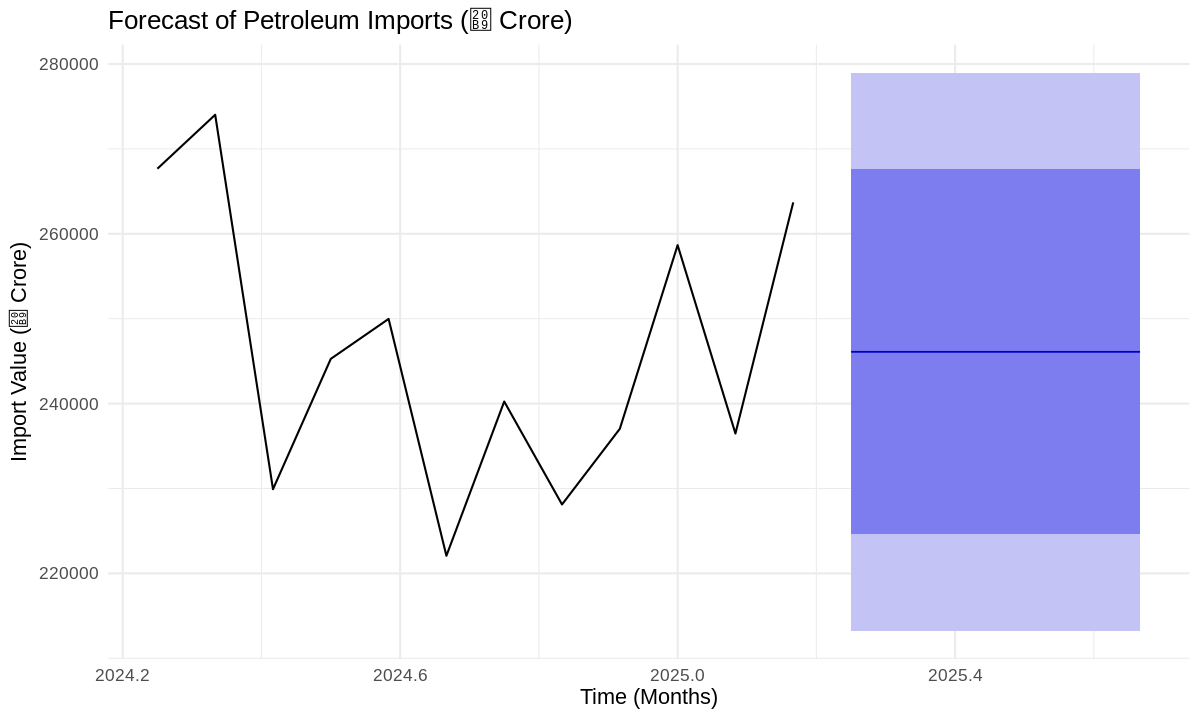

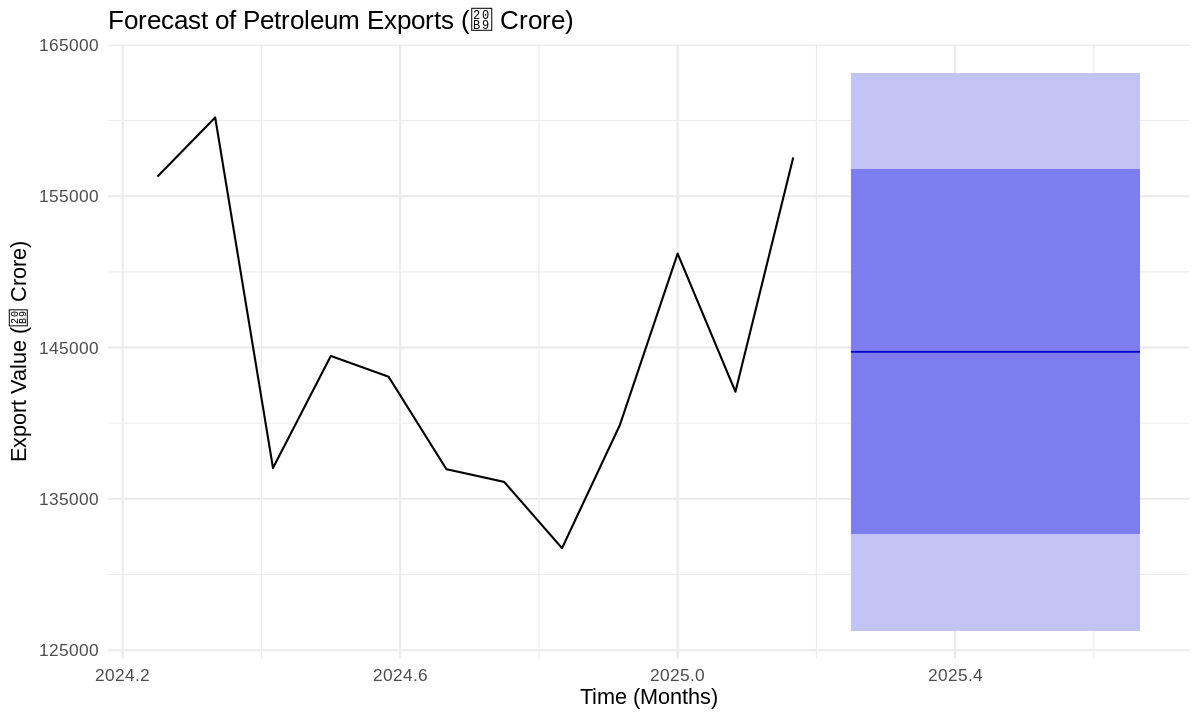

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

# Import forecast
autoplot(import_forecast) +
  ggtitle("Forecast of Petroleum Imports (₹ Crore)") +
  ylab("Import Value (₹ Crore)") +
  xlab("Time (Months)") +
  theme_minimal(base_size = 13)

# Export forecast
autoplot(export_forecast) +
  ggtitle("Forecast of Petroleum Exports (₹ Crore)") +
  ylab("Export Value (₹ Crore)") +
  xlab("Time (Months)") +
  theme_minimal(base_size = 13)


In [ ]:
colnames(consumption)


[1] "Month"                        "Year"                        
[3] "PRODUCTS"                     "Quantity (000 Metric Tonnes)"
[5] "updated_date"

In [ ]:
head(consumption)


Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
<chr>,<dbl>,<chr>,<dbl>,<date>
August,2023,ATF,676.75,2024-01-03
July,2023,ATF,663.23,2024-01-03
June,2023,ATF,642.33,2024-01-03
May,2023,ATF,670.58,2024-01-03
April,2023,ATF,655.98,2024-01-03
March,2023,ATF,688.48,2024-01-03


In [ ]:
library(readr)
library(dplyr)
library(lubridate)
library(stringr)
library(forecast)
library(ggplot2)

# Load your cleaned product consumption data
consumption <- read_csv("R_data_set_cleaned/productConsumption_clean.csv", show_col_types = FALSE)

# Clean and prepare date column (using your actual column names)
consumption <- consumption %>%
  mutate(
    Month = str_to_title(str_trim(Month)),  # Fix capitalization and spacing
    monthNum = match(substr(Month, 1, 3), substr(month.name, 1, 3)),
    date = as.Date(paste(Year, monthNum, 1, sep = "-"))
  ) %>%
  arrange(date)

# Summarize total consumption per month (in 000 Metric Tonnes)
total_consumption <- consumption %>%
  group_by(date) %>%
  summarise(totalQuantity = sum(`Quantity (000 Metric Tonnes)`, na.rm = TRUE))

head(total_consumption)


date,totalQuantity
<date>,<dbl>
2020-04-01,9373
2020-05-01,15392
2020-06-01,16059
2020-07-01,15587
2020-08-01,14390
2020-09-01,15129


In [ ]:
consumption_ts <- ts(total_consumption$totalQuantity,
                     start = c(2020, 4),  # Starting from April 2020
                     frequency = 12)      # Monthly data


In [ ]:
consumption_model <- auto.arima(consumption_ts)
summary(consumption_model)


Series: consumption_ts 
ARIMA(0,1,0) 

sigma^2 = 2685534:  log likelihood = -352.83
AIC=707.65   AICc=707.76   BIC=709.34

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 231.6296 1618.652 1232.374 1.178811 7.059674 0.8484494 -0.1707235

In [ ]:
consumption_forecast <- forecast(consumption_model, h = 12)  # 12 months = 1 year


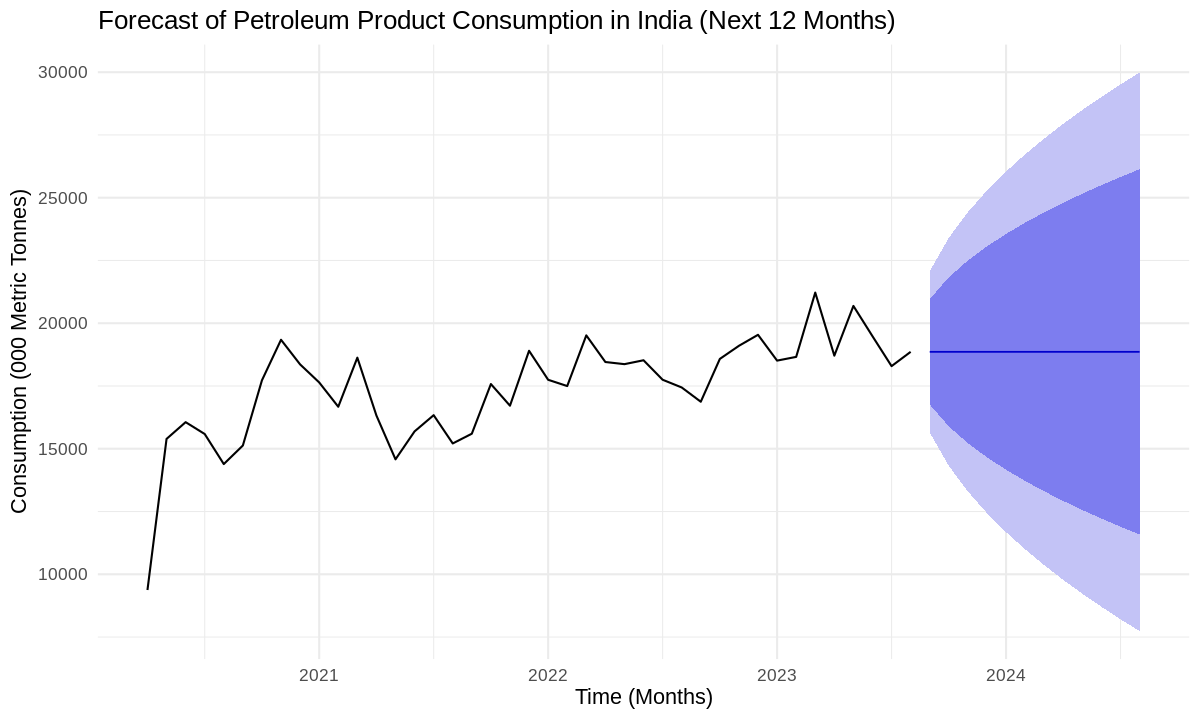

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

autoplot(consumption_forecast) +
  ggtitle("Forecast of Petroleum Product Consumption in India (Next 12 Months)") +
  xlab("Time (Months)") +
  ylab("Consumption (000 Metric Tonnes)") +
  theme_minimal(base_size = 13)
